# Figure 1 

In this notebook, we create the first figure by applying POA to two different biological networks. The data used in this notebook is sourced from the Network Data Repository (Rossi & Ahmed, 2015). Further details can be found in the associated papers for the datasets.

- Rossi, Ryan A., and Nesreen K. Ahmed. "The Network Data Repository with Interactive Graph Analytics and Visualization." *AAAI* (2015). [https://networkrepository.com](https://networkrepository.com)

In [1]:
import sys
sys.path.append('..')
from poa_utils import *

## Protein-Protein Interaction Network

Here, we used the largest connected component of a yeast protein-protein interaction (PPI) network. This network represents physical interactions between proteins in yeast, where nodes correspond to proteins and edges indicate experimentally observed interactions.

- Dataset: [bio-yeast-protein-inter.edges](https://networkrepository.com/bio-yeast-protein-inter.php)
- Jeong, H., Mason, S., Barabási, A.L., & Oltvai, Z.N. "Lethality and centrality in protein networks." *Nature* 411, 41–42 (2001). 

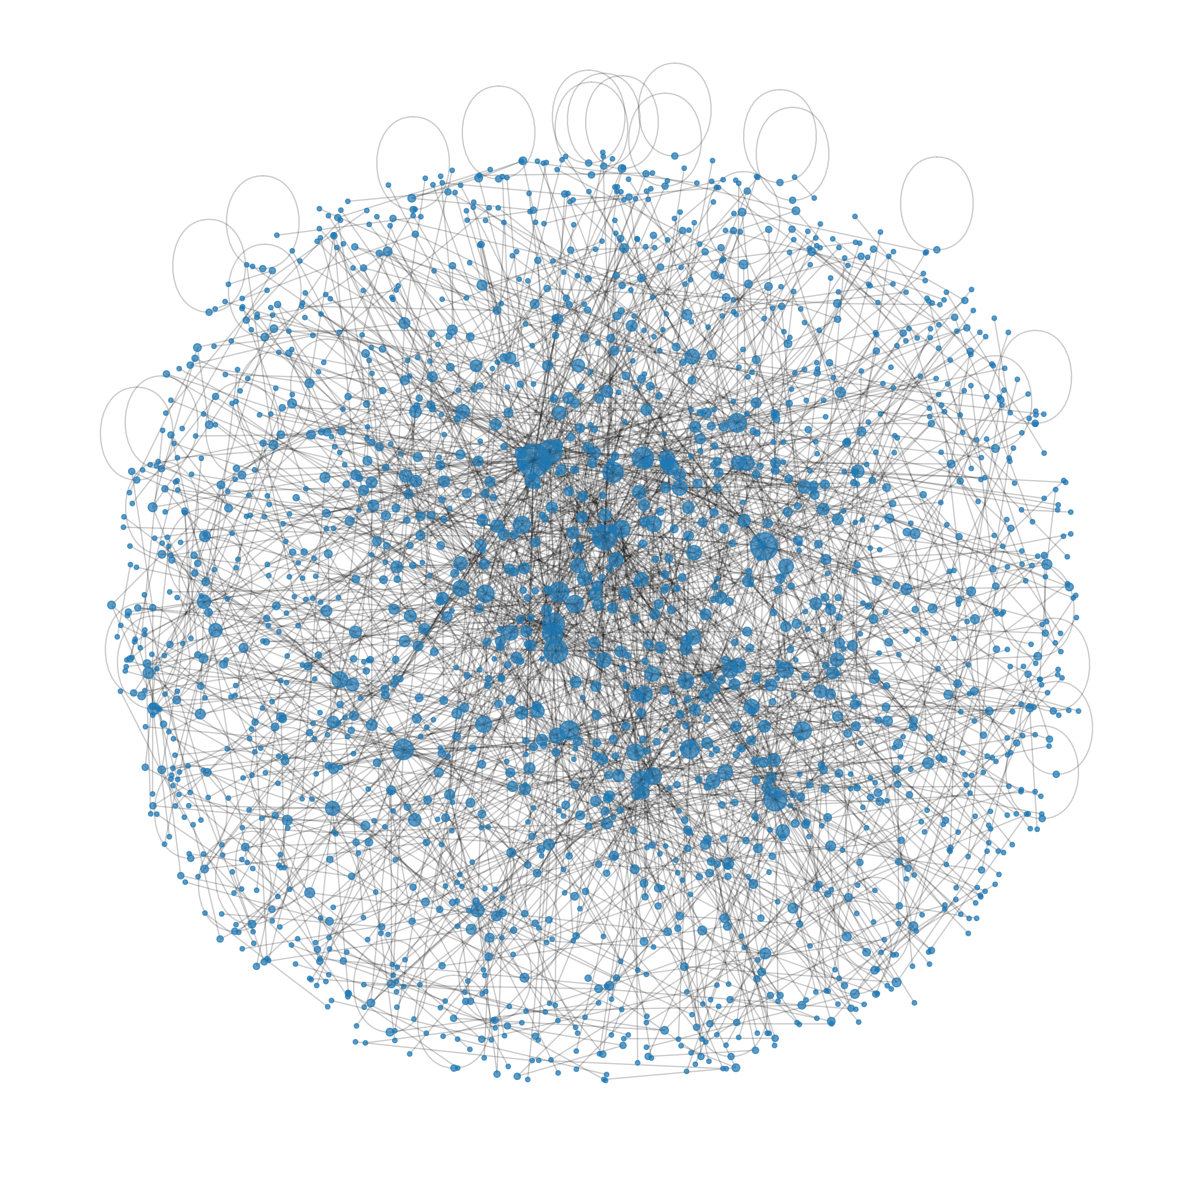

In [2]:
# Data is given in the form of an edge list there are no node attributes.
G = nx.read_edgelist('../Data/Yeast PPI/bio-yeast-protein-inter.edges')

# Use a spring layout for the positions
pos = nx.spring_layout(G, k=0.20, scale=1.0) 

# Calculate the degree of each node 
degrees = dict(G.degree()) 
# Scale the node sizes by the degree
node_sizes = [v * 10 for v in degrees.values()] 

# Draw the graph 
plt.figure(figsize=(12, 12)) 
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)
# nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')

plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

Number of connected components: 173


In [6]:
# Get the largest connected component 
largest_cc = max(nx.connected_components(G), key=len) 
G_cc = G.subgraph(largest_cc)  

# # Uncomment the following lines to visualize the largest connected component
# pos_cc = nx.spring_layout(G_cc, k=0.20, scale=1.0)
# node_sizes_cc = [degrees[node] * 10 for node in G_cc.nodes()]
# plt.figure(figsize=(8, 8))
# nx.draw_networkx_nodes(G_cc, pos_cc, node_size=node_sizes_cc, alpha=0.7)
# nx.draw_networkx_edges(G_cc, pos_cc, alpha=0.2)
# plt.axis('off')
# plt.tight_layout()
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

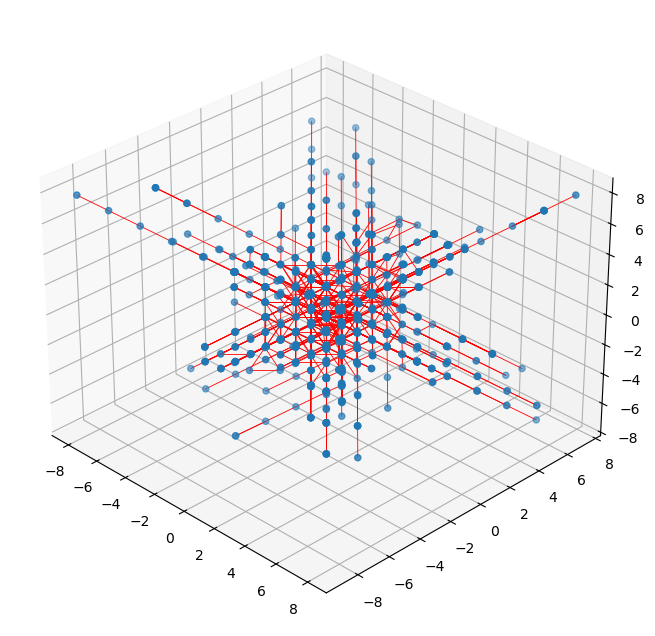

In [7]:
#apply POA to largest connected component
k = 3
np.random.seed(10)
X = poa_network(G_cc,k)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
ax.scatter(X[0],X[1],X[2])
# Create a mapping from node label to index
node_to_idx = {node: idx for idx, node in enumerate(G_cc.nodes())}
for i, j in G_cc.edges():
    idx_i = node_to_idx[i]
    idx_j = node_to_idx[j]
    ax.plot(X[0, [idx_i, idx_j]], X[1, [idx_i, idx_j]], X[2, [idx_i, idx_j]], color='red', linewidth=0.6)

ax.view_init(elev=30, azim=-45)
plt.show

## Diseasome Network

 We apply 3D POA to the diseasome network, also known as the Human Disease Network, as introduced by Goh et al. (2007). This network represents relationships between human diseases based on shared genetic associations, providing insights into the interconnectedness of various disorders.

- Dataset: [bio-diseasome.mtx](https://networkrepository.com/bio-diseasome.php)
- Goh, Kwang-Il, Michael E. Cusick, David Valle, Barton Childs, Marc Vidal, and Albert-László Barabási. "The human disease network." *Proceedings of the National Academy of Sciences* 104, no. 21 (2007): 8685-8690. [https://doi.org/10.1073/pnas.0701361104](https://doi.org/10.1073/pnas.0701361104)

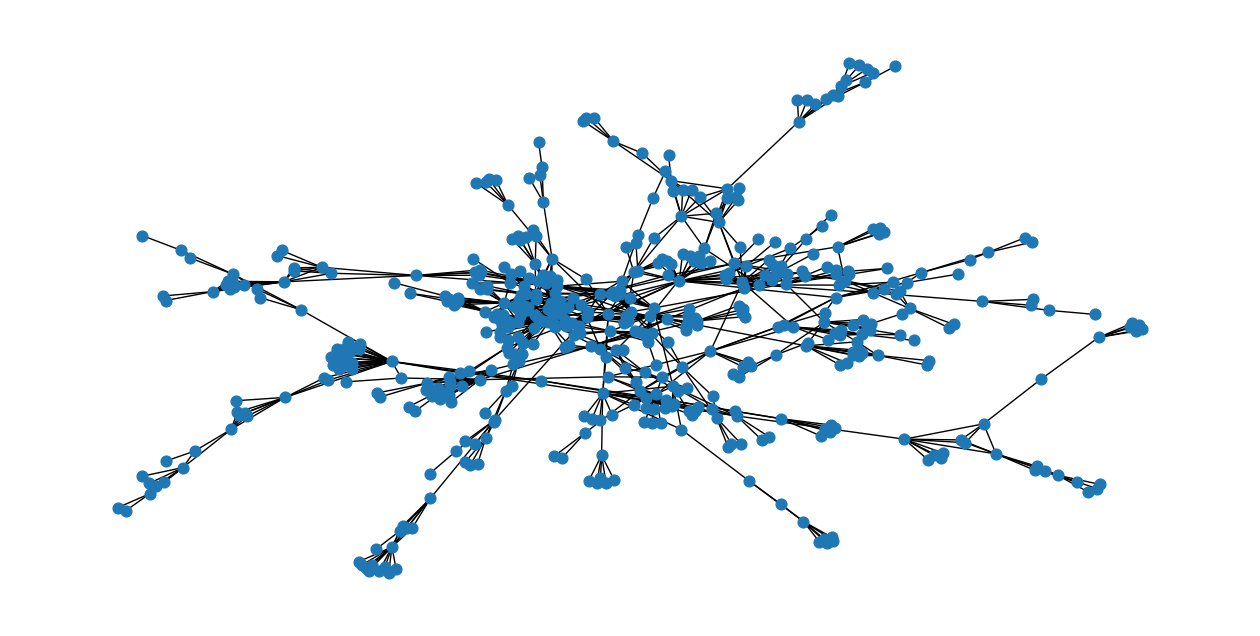

In [ ]:
matrix = scipy.io.mmread('../Data/Diseasome/bio-diseasome.mtx')
G = nx.from_scipy_sparse_array(matrix)
fig, ax = plt.subplots( figsize = (16,8))
np.random.seed(23)
nx.draw_networkx(G, with_labels = False, node_size=60, width=1)
plt.box(False)

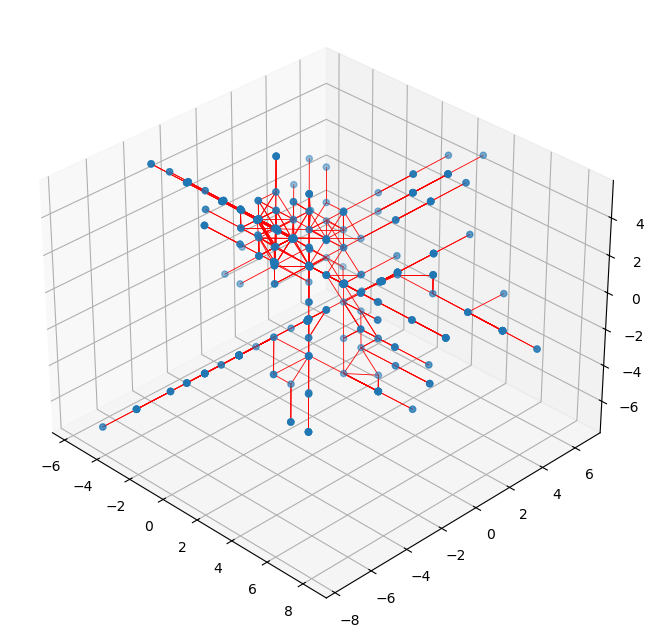

In [9]:
# Apply POA 
k = 3
np.random.seed(10)
X = poa_network(G,k)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
ax.scatter(X[0],X[1],X[2])
for i, j in G.edges():
    ax.plot(X[0,[i,j]],X[1,[i,j]],X[2,[i,j]],color = 'red', linewidth = 0.6)

ax.view_init(elev=32, azim=-45)
plt.show()

## 